In [174]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits


### Task 1.1

In [175]:
def non_negative(data,num_components):
    '''
    non negative matrix factorization
    '''

    ## initialize Z0 and H0 as absolute value of standard normal RVs
    Z = np.abs(np.random.randn(data.shape[0],num_components))
    H = np.abs(np.random.randn(num_components,data.shape[1]))

    t = 1000

    losses = []

    for _ in range(t):
        H = H * (Z.T @ data) / np.clip((Z.T @ Z @ H),1e-10,np.inf)
        Z = Z * (data @ H.T) / np.clip((Z @ H @ H.T),1e-10,np.inf)

        loss = np.linalg.norm(data - Z @ H)
        losses.append(loss)

    return Z,H,losses

In [176]:
digits = load_digits()
print (digits.keys())
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


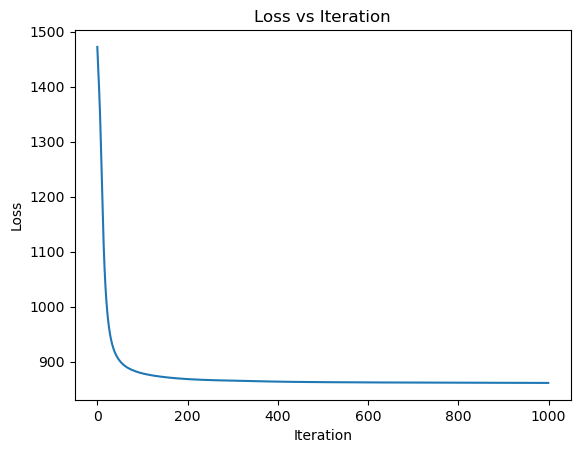

In [177]:
from sklearn.decomposition import NMF

Z,H,losses = non_negative(data,10)

model = NMF(n_components=10,init="nndsvd",max_iter=1000)
Z_sk = model.fit_transform(data)
H_sk = model.components_


## plot losses 
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs Iteration")
plt.show()


(10, 64)


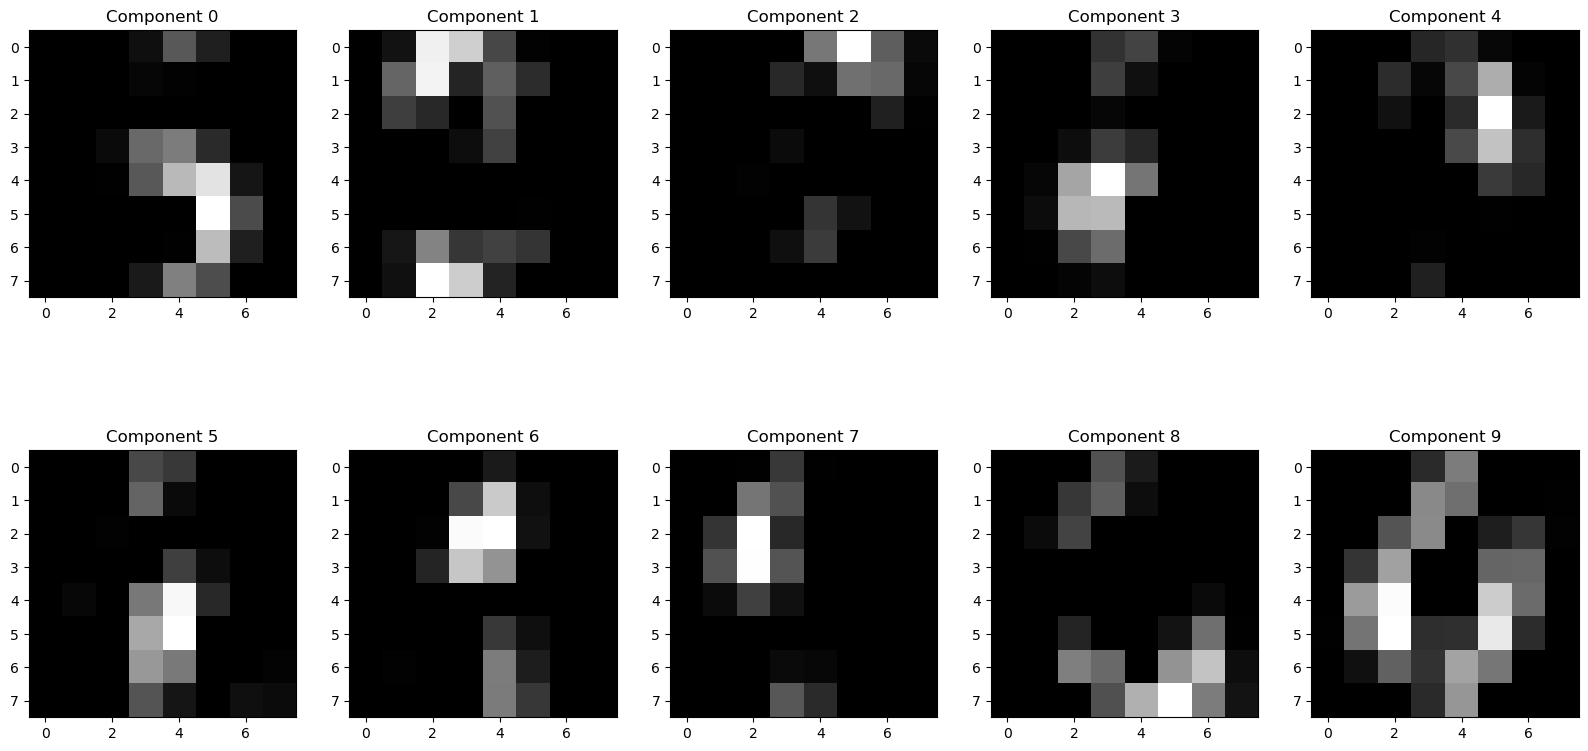

In [178]:
print(H.shape)

## plot the components as 8x8 grayscale images
fig,ax = plt.subplots(2,5,figsize=(20,10))
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(H[i*5+j].reshape(8,8),cmap="gray")
        ax[i,j].set_title(f"Component {i*5+j}")

(10, 64)


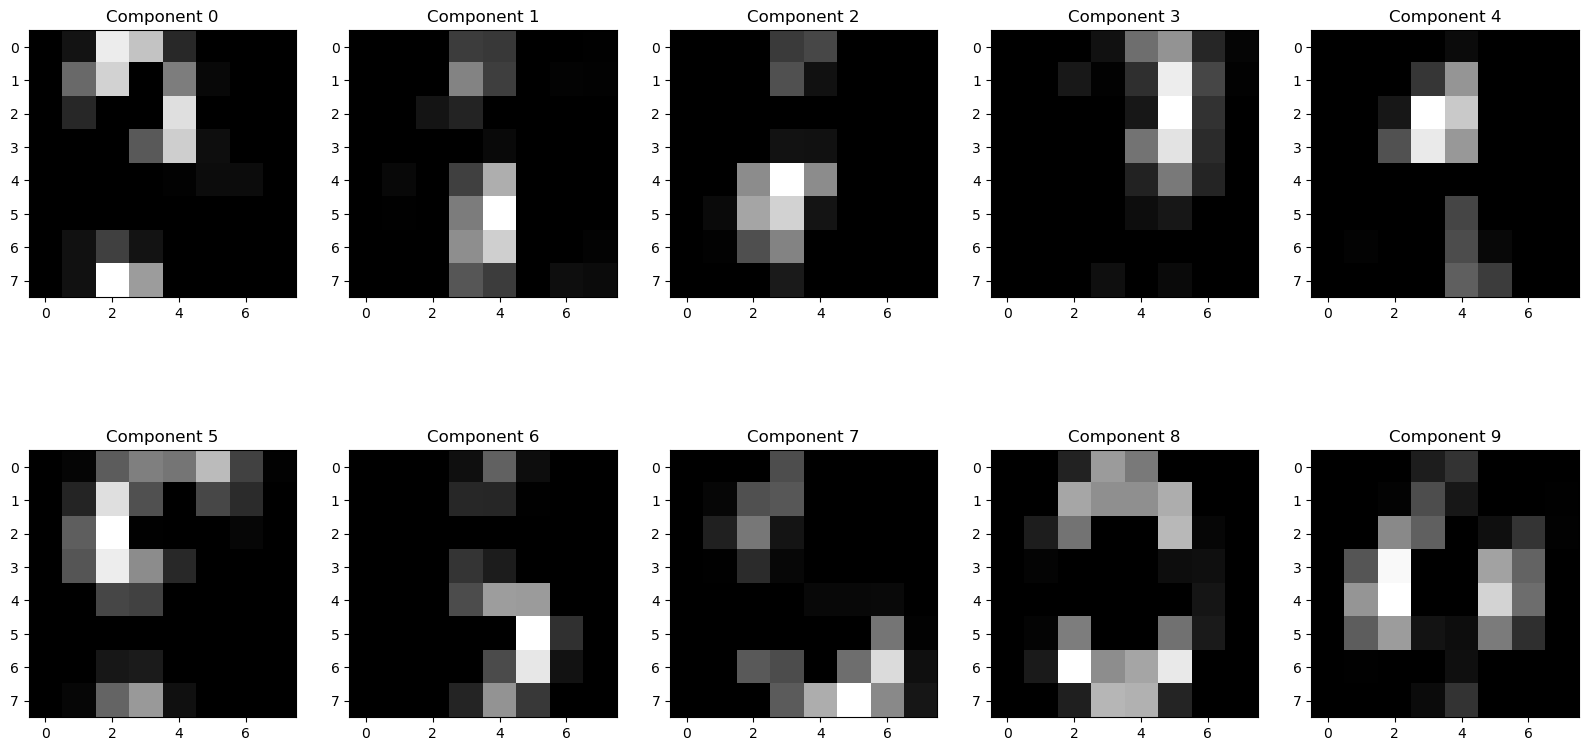

In [179]:
print(H_sk.shape)

## plot the components as 8x8 grayscale images
fig,ax = plt.subplots(2,5,figsize=(20,10))
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(H_sk[i*5+j].reshape(8,8),cmap="gray")
        ax[i,j].set_title(f"Component {i*5+j}")

### Task 1.2

In [180]:
import pandas as pd

In [181]:

#column headers for the dataset
ratings_cols = ['user id','movie id','rating','timestamp'] 
movies_cols = ['movie id','movie title','release date', 'video release date','IMDb URL','unknown','Action', 'Adventure','Animation','Childrens','Comedy','Crime', 'Documentary','Drama','Fantasy','Film-Noir','Horror', 'Musical','Mystery','Romance ','Sci-Fi','Thriller',
'War' ,'Western']
users_cols = ['user id','age','gender','occupation', 'zip code']

genres = ['unknown','Action', 'Adventure','Animation','Childrens','Comedy','Crime', 'Documentary','Drama','Fantasy','Film-Noir','Horror', 'Musical','Mystery','Romance ','Sci-Fi','Thriller']

In [182]:
users = pd.read_csv('ml-100k/u.user', sep='|', names=users_cols , encoding='latin -1')

movies = pd.read_csv('ml-100k/u.item', sep='|', names=movies_cols , encoding='latin -1')

ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=ratings_cols , encoding='latin -1')


In [183]:
# peek at the dataframes, if you like :)
users.head() 

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [184]:
movies.head() 

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [185]:
ratings.head()


,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [186]:
# create a joint ratings dataframe for the matrix
fill_value = 0
rat_df = ratings.pivot(index = 'user id',
columns ='movie id', values = 'rating').fillna(fill_value) 
rat_df.head()

movie id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
rat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 1 to 943
Columns: 1682 entries, 1 to 1682
dtypes: float64(1682)
memory usage: 12.1 MB


In [188]:
def get_ratings_user(user_id,rating_matrix):
    '''returns a line from rat_df'''
    return rating_matrix.loc[user_id]

get_ratings_user(1,rat_df)

movie id
1       5.0
2       3.0
3       4.0
4       3.0
5       3.0
       ... 
1678    0.0
1679    0.0
1680    0.0
1681    0.0
1682    0.0
Name: 1, Length: 1682, dtype: float64

In [189]:
def show_sparsity(X):
    '''
    show the sparsity of the matrix X
    '''
    sparsity = np.sum(X == 0) / np.prod(X.shape)
    print(f"Sparsity: {sparsity}")

show_sparsity(rat_df.values)

Sparsity: 0.9369533063577546


In [190]:
model = NMF(n_components=len(genres),init="random",max_iter=1000)
Z= model.fit_transform(rat_df.values) ## looses the index of users here, since it will start from 0
H = model.components_

## predict using the model
pred = Z @ H
show_sparsity(pred)
print("Prediciton shape:",pred.shape)
print("H shape",H.shape)
print("Z shape",Z.shape)

Sparsity: 0.11354772571662024
Prediciton shape: (943, 1682)
H shape (17, 1682)
Z shape (943, 17)


/opt/miniconda3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


In [191]:
reconstruction = pd.DataFrame(pred, columns = rat_df.columns) 
reconstruction.set_index(rat_df.index,inplace=True)
reconstruction.head()


movie id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,4.271215,1.984988,1.051805,2.998100,0.681592,0.527479,5.194296,2.417696,3.063807,2.011867,...,0.007401,0.024886,0.008878,0.005918,0.022093,0.000000,0.000000,0.000000,0.016971,0.033524
2,2.249243,0.002516,0.180578,0.098882,0.056462,0.414191,2.154157,0.287285,2.925453,0.814740,...,0.000034,0.000069,0.015800,0.010533,0.012371,0.008545,0.025635,0.017090,0.000182,0.000169
3,0.179311,0.018400,0.106344,0.157071,0.004018,0.006014,0.210733,0.118044,0.116545,0.000000,...,0.000000,0.000013,0.009850,0.006567,0.001775,0.007841,0.023522,0.015681,0.000104,0.002285
4,0.654285,0.020922,0.056530,0.090559,0.044038,0.000061,0.446154,0.148131,0.071652,0.000000,...,0.000570,0.000044,0.001004,0.000669,0.001109,0.003251,0.009754,0.006503,0.000239,0.000023
5,3.439486,1.103130,0.391184,1.495964,0.824813,0.000000,3.137919,1.072532,0.044208,0.603708,...,0.000581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006726,0.004867


In [192]:
reconstruction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 1 to 943
Columns: 1682 entries, 1 to 1682
dtypes: float64(1682)
memory usage: 12.1 MB


In [193]:
get_ratings_user(1,reconstruction)

movie id
1       4.271215
2       1.984988
3       1.051805
4       2.998100
5       0.681592
          ...   
1678    0.000000
1679    0.000000
1680    0.000000
1681    0.016971
1682    0.033524
Name: 1, Length: 1682, dtype: float64

In [194]:
def get_top_movies(user_id, n=10):
    '''
    get the top n movies for a user
    '''
    user_ratings = rat_df.loc[user_id]
    top_movies = user_ratings.sort_values(ascending=False).head(n)
    return top_movies

def get_unrated_movies(user_id):
    '''
    get the unrated movies title and id for a user
    '''

    user_ratings = rat_df.loc[user_id]
    unrated_movies = user_ratings[user_ratings == 0].index
    unrated_movies = movies[movies["movie id"].isin(unrated_movies)]
    return unrated_movies['movie title']

def compare_ratings(user_id,filter_high_rating=False):
    '''
    compare the ratings of a user with the reconstructed ratings
    '''
    original_ratings = get_ratings_user(user_id,rat_df).values
    reconstructed_ratings = get_ratings_user(user_id,reconstruction).values

    combined = np.vstack([original_ratings,reconstructed_ratings]).T
    filtered = combined[combined[:,0] == 0.0]

    if filter_high_rating:
        filtered = filtered[filtered[:,1] > 3]
    
    return filtered

def get_movie_title(movie_id):
    '''
    get the movie title from the movie id
    '''
    return movies[movies["movie id"] == movie_id]["movie title"].values[0]

In [195]:
def recommend_movies(reconstruction, user_id, movies, ratings):
    '''
    recommend movies to a user
    '''
    original_ratings = get_ratings_user(user_id,rat_df).values
    reconstructed_ratings = get_ratings_user(user_id,reconstruction).values

    ## create a merged dataframe with the original and reconstructed ratings, merged on the column movie id
    combined = pd.DataFrame({"original":original_ratings,"reconstructed":reconstructed_ratings})
    combined["movie id"] = rat_df.columns
    ## keep only the movies that the user has not rated yet
    combined = combined[combined["original"] == 0]
    ## filter out the movies that have a high rating in the reconstructed ratings
    combined = combined[combined["reconstructed"] > SENSITIVITY]

    ## get the movie ids as a list
    movie_ids = combined["movie id"].values
    movie_ratings = combined["reconstructed"].values
    ## get the movie titles from the movie ids
    movie_titles = [get_movie_title(movie_id) for movie_id in movie_ids]

    return movie_titles, movie_ratings

recommend_movies(reconstruction,5,movies,ratings)



(['Twelve Monkeys (1995)', 'Brazil (1985)'], array([3.13791863, 3.34606154]))

In [199]:
USER_ID = 6
SENSITIVITY = 3.0

titles, _ = recommend_movies(reconstruction,USER_ID,movies,ratings)
print("Recommend movie for user",USER_ID)
print(titles)

Recommend movie for user 6
['Empire Strikes Back, The (1980)', 'Clockwork Orange, A (1971)', 'Rear Window (1954)', 'Chinatown (1974)', 'Manchurian Candidate, The (1962)', 'High Noon (1952)', "Singin' in the Rain (1952)"]
